# Fake News Detection

This notebook demonstrates the complete pipeline for detecting fake news using NLP and machine learning.

**Methods:**
- TF-IDF vectorization for text features
- Logistic Regression classifier
- Support Vector Machine (SVM) classifier

**Dataset:** Synthetic fake news samples (or Kaggle dataset if available)

## 1. Setup and Imports

In [1]:
import sys
import os

# Add parent directory to path to import from src/
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

from src.utils import prepare_texts, get_vectorizer
from src.generate_sample_data import generate_dataset

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

## 2. Generate Sample Data

We'll generate synthetic fake and real news samples for demonstration.

In [2]:
# Generate synthetic dataset
train_path, test_path = generate_dataset(n_samples=1000, output_path='../data/sample_data.csv', test_split=0.2)

print(f"\nTrain data: {train_path}")
print(f"Test data: {test_path}")

Generated 800 training samples -> ../data/sample_data_train.csv
Generated 200 test samples -> ../data/sample_data_test.csv
Class distribution (train): {1: 401, 0: 399}

Train data: ../data/sample_data_train.csv
Test data: ../data/sample_data_test.csv


## 3. Load and Explore Data

In [3]:
# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")
print(f"\nClass distribution (train):")
print(train_df['label'].value_counts())

train_df.head()

Training set size: 800
Test set size: 200

Class distribution (train):
label
1    401
0    399
Name: count, dtype: int64


,text,label
0,"Google reports quarterly earnings, stock down ...",1
1,Patriots wins against Eagles in close match,1
2,Community fundraiser raises $100000 for animal...,1
3,Governor speaks at conference about healthcare,1
4,BREAKING: Scientists discover chocolate can cu...,0


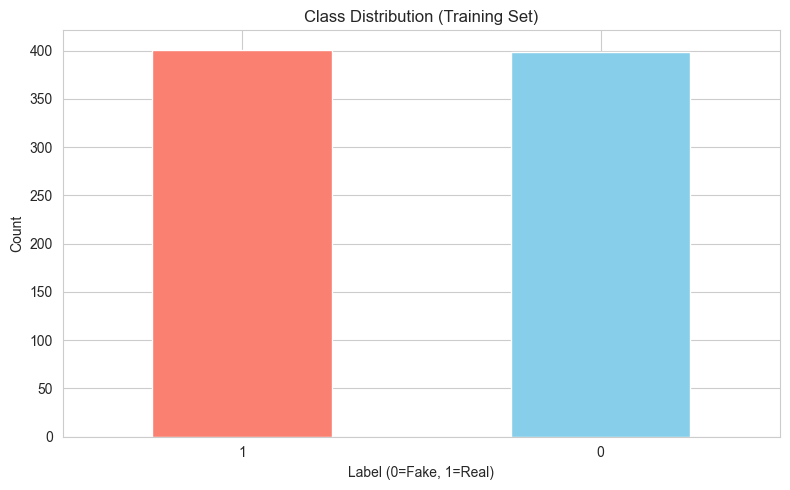

In [4]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
train_df['label'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Class Distribution (Training Set)')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
# Sample fake and real news
print("Sample FAKE news:")
print(train_df[train_df['label']==0]['text'].iloc[0])
print("\nSample REAL news:")
print(train_df[train_df['label']==1]['text'].iloc[0])

Sample FAKE news:
BREAKING: Scientists discover chocolate can cure arthritis!

Sample REAL news:
Google reports quarterly earnings, stock down by 12%


## 4. Text Preprocessing

In [6]:
# Clean text
train_df['text_clean'] = prepare_texts(train_df['text'])
test_df['text_clean'] = prepare_texts(test_df['text'])

print("Original text:")
print(train_df['text'].iloc[0])
print("\nCleaned text:")
print(train_df['text_clean'].iloc[0])

Original text:
Google reports quarterly earnings, stock down by 12%

Cleaned text:
google reports quarterly earnings stock down by 12


## 5. Feature Extraction (TF-IDF)

In [7]:
# Create TF-IDF vectorizer
vectorizer = get_vectorizer(max_features=5000)

# Fit and transform
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])
y_train = train_df['label']
y_test = test_df['label']

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

Training features shape: (800, 724)
Test features shape: (200, 724)
Vocabulary size: 724


## 6. Train Models

In [8]:
# Train Logistic Regression
print("Training Logistic Regression...")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=['Fake', 'Real']))

Training Logistic Regression...
Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       101
        Real       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [9]:
# Train SVM
print("Training SVM...")
svm = LinearSVC(max_iter=10000, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {acc_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Fake', 'Real']))

Training SVM...
SVM Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       101
        Real       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 7. Model Evaluation

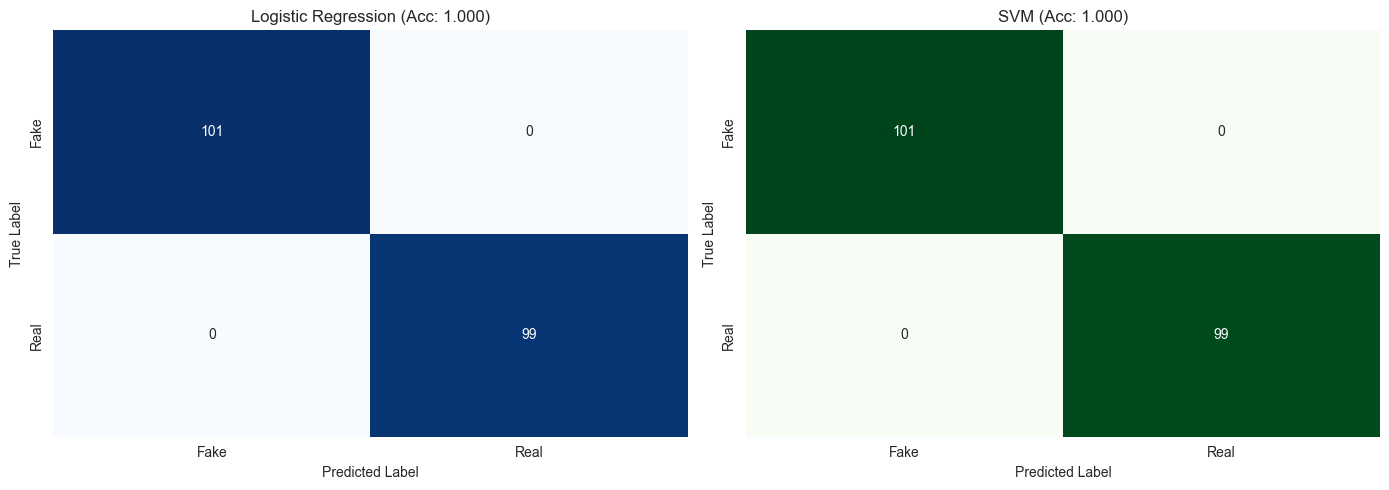

In [10]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], ax=axes[0])
axes[0].set_title(f'Logistic Regression (Acc: {acc_logreg:.3f})')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], ax=axes[1])
axes[1].set_title(f'SVM (Acc: {acc_svm:.3f})')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

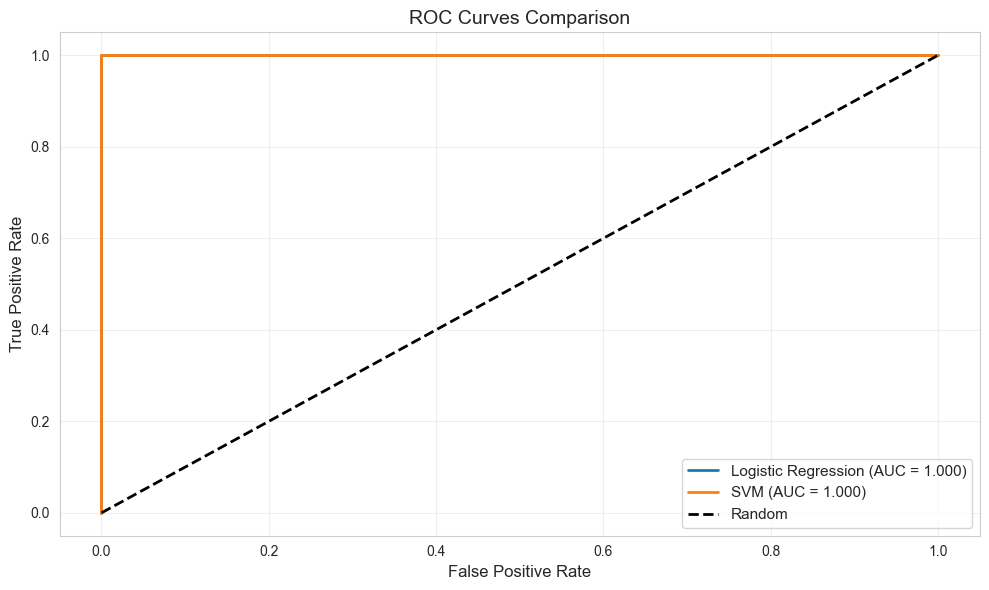

In [11]:
# ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression ROC
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_logreg)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)

# SVM ROC
y_scores_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})', linewidth=2)

# Random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Test Predictions on Custom Text

In [12]:
from src.utils import clean_text

def predict_news(text, model, vectorizer):
    """Predict if a news article is fake or real."""
    cleaned = clean_text(text)
    X = vectorizer.transform([cleaned])
    prediction = model.predict(X)[0]
    
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X)[0]
        confidence = proba[prediction]
    else:
        confidence = None
    
    label = 'REAL' if prediction == 1 else 'FAKE'
    
    return label, confidence

# Test samples
test_texts = [
    "Scientists at MIT announce breakthrough in renewable energy research",
    "SHOCKING: Aliens discovered living among us, government admits!",
    "Local council approves new infrastructure project for public transportation",
    "You won't believe what this celebrity said about vaccines!"
]

print("Predictions using Logistic Regression:\n")
for text in test_texts:
    label, conf = predict_news(text, logreg, vectorizer)
    conf_str = f" (confidence: {conf:.2%})" if conf else ""
    print(f"Text: {text}")
    print(f"Prediction: {label}{conf_str}\n")

Predictions using Logistic Regression:

Text: Scientists at MIT announce breakthrough in renewable energy research
Prediction: REAL (confidence: 52.32%)

Text: SHOCKING: Aliens discovered living among us, government admits!
Prediction: FAKE (confidence: 79.94%)

Text: Local council approves new infrastructure project for public transportation
Prediction: REAL (confidence: 93.98%)

Text: You won't believe what this celebrity said about vaccines!
Prediction: FAKE (confidence: 91.46%)



## 9. Feature Importance (Top Words)

In [13]:
# Get feature names and coefficients from Logistic Regression
feature_names = vectorizer.get_feature_names_out()
coefficients = logreg.coef_[0]

# Top words for FAKE news (negative coefficients)
top_fake_indices = np.argsort(coefficients)[:20]
top_fake_words = [(feature_names[i], coefficients[i]) for i in top_fake_indices]

# Top words for REAL news (positive coefficients)
top_real_indices = np.argsort(coefficients)[-20:]
top_real_words = [(feature_names[i], coefficients[i]) for i in top_real_indices]

print("Top 20 words indicating FAKE news:")
for word, coef in top_fake_words:
    print(f"  {word}: {coef:.4f}")

print("\nTop 20 words indicating REAL news:")
for word, coef in reversed(top_real_words):
    print(f"  {word}: {coef:.4f}")

Top 20 words indicating FAKE news:
  cure: -1.6343
  ban: -1.4771
  month: -1.3187
  starting month: -1.3187
  starting: -1.3187
  heading: -1.1646
  alert: -1.1646
  heading straight: -1.1646
  straight: -1.1646
  said: -1.1564
  believe: -1.1564
  won believe: -1.1564
  won: -1.1564
  hiding: -1.1351
  government hiding: -1.1351
  hiding truth: -1.1351
  truth: -1.1351
  shocking: -1.0827
  planning: -1.0827
  secretly planning: -1.0827

Top 20 words indicating REAL news:
  new: 1.6285
  speaks conference: 1.4658
  speaks: 1.4658
  conference: 1.4658
  announces: 1.3306
  new policy: 1.3306
  announces new: 1.3306
  policy: 1.3306
  raises: 1.2326
  fundraiser raises: 1.2326
  fundraiser: 1.2326
  community: 1.2326
  community fundraiser: 1.2326
  research: 1.2001
  researchers: 1.2001
  progress: 1.2001
  make progress: 1.2001
  feature: 1.1832
  feature released: 1.1832
  released: 1.1832


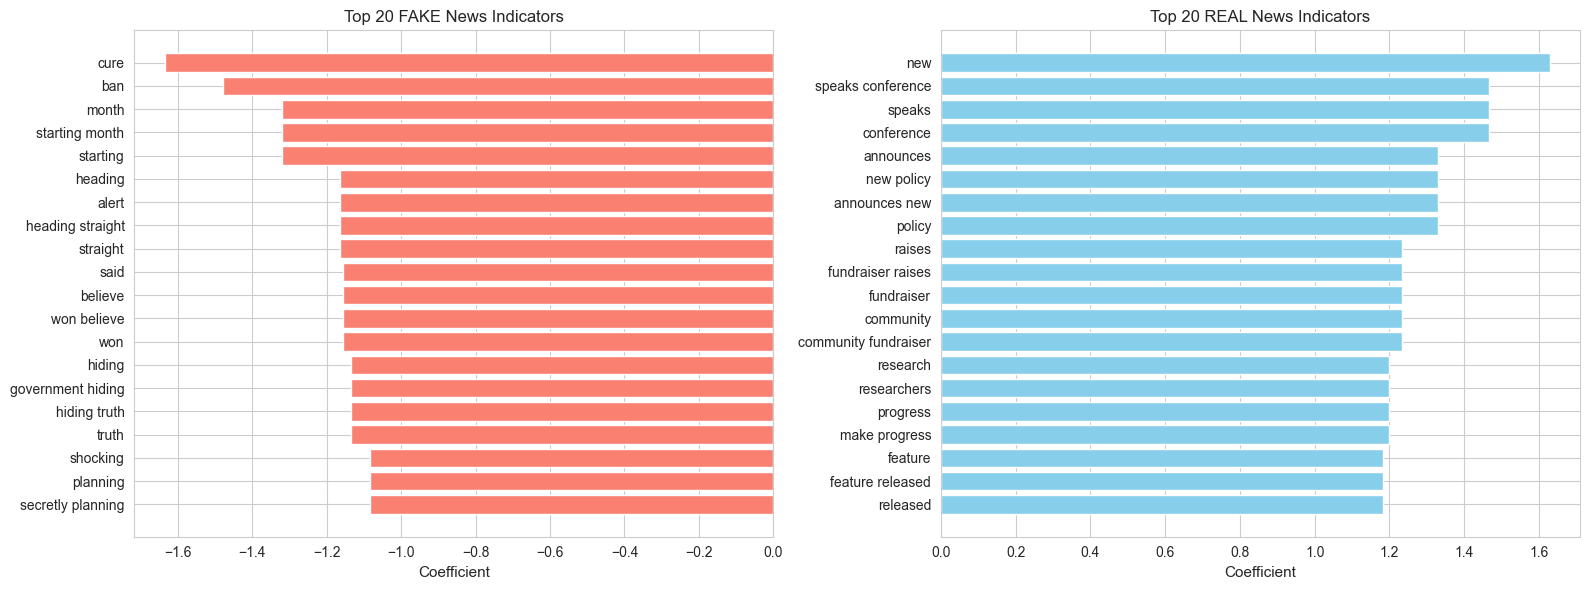

In [14]:
# Visualize top features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Fake news indicators
fake_words = [w for w, c in top_fake_words]
fake_coefs = [c for w, c in top_fake_words]
axes[0].barh(fake_words, fake_coefs, color='salmon')
axes[0].set_xlabel('Coefficient', fontsize=11)
axes[0].set_title('Top 20 FAKE News Indicators', fontsize=12)
axes[0].invert_yaxis()

# Real news indicators
real_words = [w for w, c in reversed(top_real_words)]
real_coefs = [c for w, c in reversed(top_real_words)]
axes[1].barh(real_words, real_coefs, color='skyblue')
axes[1].set_xlabel('Coefficient', fontsize=11)
axes[1].set_title('Top 20 REAL News Indicators', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 10. Save Model

Save the best performing model for later use.

In [15]:
import joblib

# Choose best model (by accuracy)
if acc_logreg >= acc_svm:
    best_model = logreg
    best_name = 'logreg'
else:
    best_model = svm
    best_name = 'svm'

print(f"Best model: {best_name}")

# Save
os.makedirs('../models', exist_ok=True)
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')

print("Model and vectorizer saved to ../models/")

Best model: logreg
Model and vectorizer saved to ../models/


## Summary

This notebook demonstrated:
1. Generating synthetic fake/real news data
2. Text preprocessing and cleaning
3. TF-IDF feature extraction
4. Training Logistic Regression and SVM classifiers
5. Model evaluation with confusion matrices and ROC curves
6. Feature importance analysis
7. Making predictions on new text

**Next Steps:**
- Try the real Kaggle dataset for better results
- Experiment with different hyperparameters
- Try deep learning models (LSTM, BERT)
- Add more sophisticated text preprocessing (lemmatization, etc.)